# Архитектура matplotlib

Matplotlib был [создан в 2003 году](https://matplotlib.org/users/history.html), создатель постарался унаследовать интерфейс проекта **MATLAB** для построения графиков.

[Архитектурно](https://www.aosabook.org/en/matplotlib.html) Matplotlib из трёх частей

* [Backend Layer](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend) - имплементация низком уровне объектов для отрисовки
 * FigureCanvas - поверхность для отрисовки (например, файлы PDF, PNG, SVG, или PS)
 * Renderer - собственно рисователь (примитивы draw_point, draw_line, draw_rectangle, draw_image и т.д.)
 * Event - цикл перехватывания и обработки пользовательских событий (примитивы key-press-event, mouse-motion-event)
* [Artist Layer](https://matplotlib.org/tutorials/intermediate/artists.html) отвечает за интеракции с Renderer->Canvas, реализует метод `draw`. Например, в этот слой входит [Axis](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/axes/_axes.py)
* Scripting Layer (pyplot) - API верхнего уровня, которым непосредственно пользуются разработчики.

Разработчики взаимодействуют с верхним (скриптовым) уровнем `pyplot`. В сети есть множество примеров построения графиков с использованием [pylab](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/pylab.py) - это устаревший код, так делать не нужно. Графики рекомендуется строить с помощью интерфейсса [pyplot](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/pyplot.py)

Каждый график основывается представляет собой древовидную структуру объектов matplotlib - от "главных" объектов всё ниже и ниже до объектов нижнего уровня. На верхнем уровне - объект **Figure**, который может включать в себя несколько объектов **Axes** (различные линии, графики, оси координат, легенды и т.д.)

Объект Axes, в свою очередь, содержит набор элементов холста (более низкого уровня иерархии): 
* Axis - координатные оси
* Tick - отметки на координатной оси
* Line2D - объект линии
* Text - объект теста
* Polygon - многоугольник

А так же Axes содержит элементы координатной системы.

Для примера продемонстрируем, как нарисовать точку

объект Figure: <class 'matplotlib.figure.Figure'>, 
объект subplot: <class 'matplotlib.axes._subplots.AxesSubplot'>, 
Иерархический доступ к объекту Subplot: <class 'matplotlib.axes._subplots.AxesSubplot'>



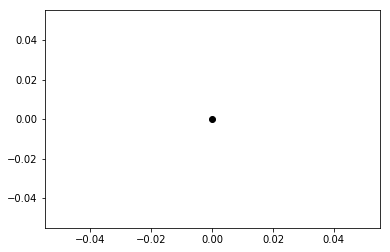

In [1]:
import matplotlib.pyplot as plt
# для корректного отображения в ноутбучеках
%matplotlib inline

# получаем доступ к холсту для рисования
fig, subplot = plt.subplots()

# Типизация объектов из Matplotlib
print("объект Figure: %s, \nобъект subplot: %s, \nИерархический доступ к объекту Subplot: %s\n" % (
    type(fig), type(subplot), type(fig.axes[0])
))
# рисуем жирную точку в начале координат c с помощью метода plot
subplot.plot([0], 'o', color='black')

Метод **plt.plot()** – это удобный способ получения текущего объекта [Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) из активного объекта Figure и совершения необходимых действий (действия реализуются в лучших традициях ООП, через сеттеры и геттеры, например: у нас есть метод для подписи графика [plt.title()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html), который под камотом использует метод-сеттер [set_axis](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/axes/_axes.py#L128)). Основные элементы Matplotlib отображены на картинке из [официальной документации](https://matplotlib.org/examples/showcase/anatomy.html)

Теперь загрузим датасет с измерениями показателей загрязнения воздуха [Air quality](http://archive.ics.uci.edu/ml/datasets/air+quality)

In [12]:
import pandas as pd
from datetime import datetime

air_df = pd.read_csv('./data/air_quality.tar.gz', compression='gzip', sep=';', encoding='utf8')
air_df = air_df[air_df.iloc[:,0].notnull()]

# формируем столбец с таймстемпом
air_df['ts'] = (air_df.iloc[:,0]+ ' ' + air_df.iloc[:,1]).map(
    lambda x: datetime.strptime(x.replace('.',':'), "%d/%m/%Y %H:%M:%S")
)

air_df

,air_quality.csv,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,ts
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",2004-03-10 23:00:00
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",2004-03-11 00:00:00
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",2004-03-11 01:00:00
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",2004-03-11 02:00:00
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",2004-03-11 03:00:00


In [5]:
?air_df.iloc